## Setup

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import sys
from pathlib import Path

# Assuming this notebook is in research-vision/notebooks/
PROJECT_ROOT = Path.cwd().parent  # go up one level to research-vision
sys.path.append(str(PROJECT_ROOT))

print("Project root added to sys.path:", PROJECT_ROOT)

# Import from our core modules
from core.pdf.pdf_loader import load_pdf_to_images
from core.preprocessing.preprocess import (
    to_grayscale,
    equalize_histogram,
    equalize_clahe,
    denoise_gaussian,
    denoise_median,
    binarize_otsu,
    binarize_adaptive,
    run_full_preprocessing
)

# Configure matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

Project root added to sys.path: d:\Research Vision\research-vision


## Load Sample PDF

In [2]:
# Load a sample PDF
data_dir = PROJECT_ROOT / "data"
pdf_path = data_dir / "attention is all you need.pdf"

if pdf_path.exists():
    pages = load_pdf_to_images(str(pdf_path), dpi=200)
    print(f"Loaded {len(pages)} pages")
    sample_page = pages[0]
    print(f"Page shape: {sample_page.shape}")
else:
    print(f"PDF not found at {pdf_path}")
    print("Please update the path or place a PDF in the data/ directory")

Loaded 15 pages
Page shape: (2200, 1700, 3)


## Test Individual Preprocessing Functions

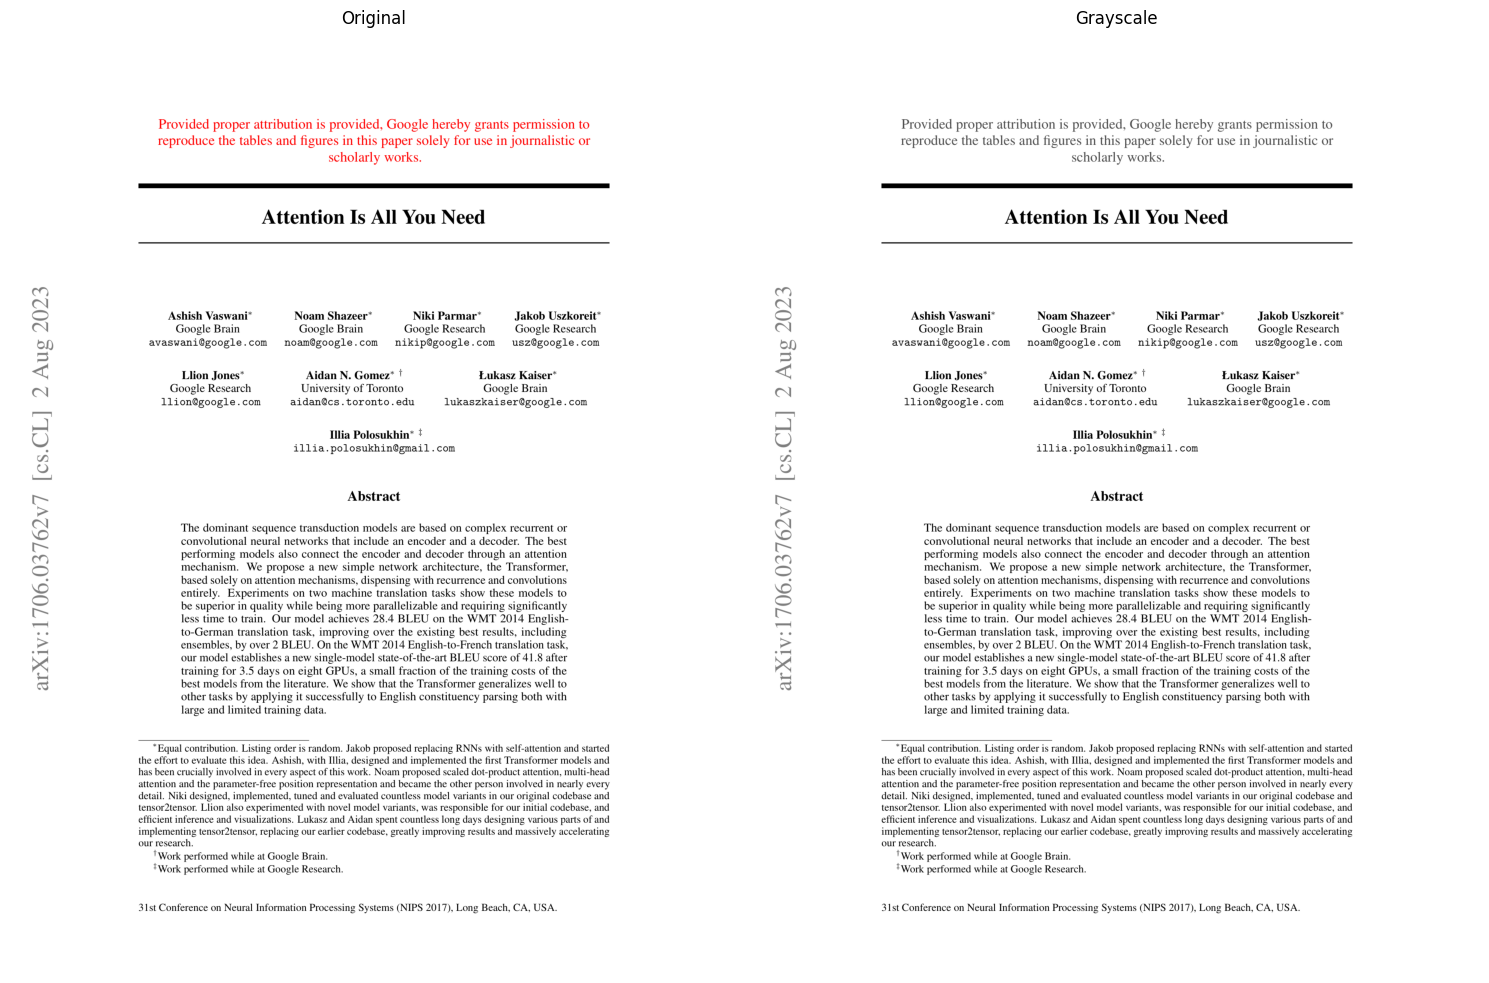

In [3]:
# Convert to grayscale
gray = to_grayscale(sample_page)

# Display
fig, axes = plt.subplots(1, 2)
axes[0].imshow(cv2.cvtColor(sample_page, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(gray, cmap='gray')
axes[1].set_title('Grayscale')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Compare Different Binarization Methods

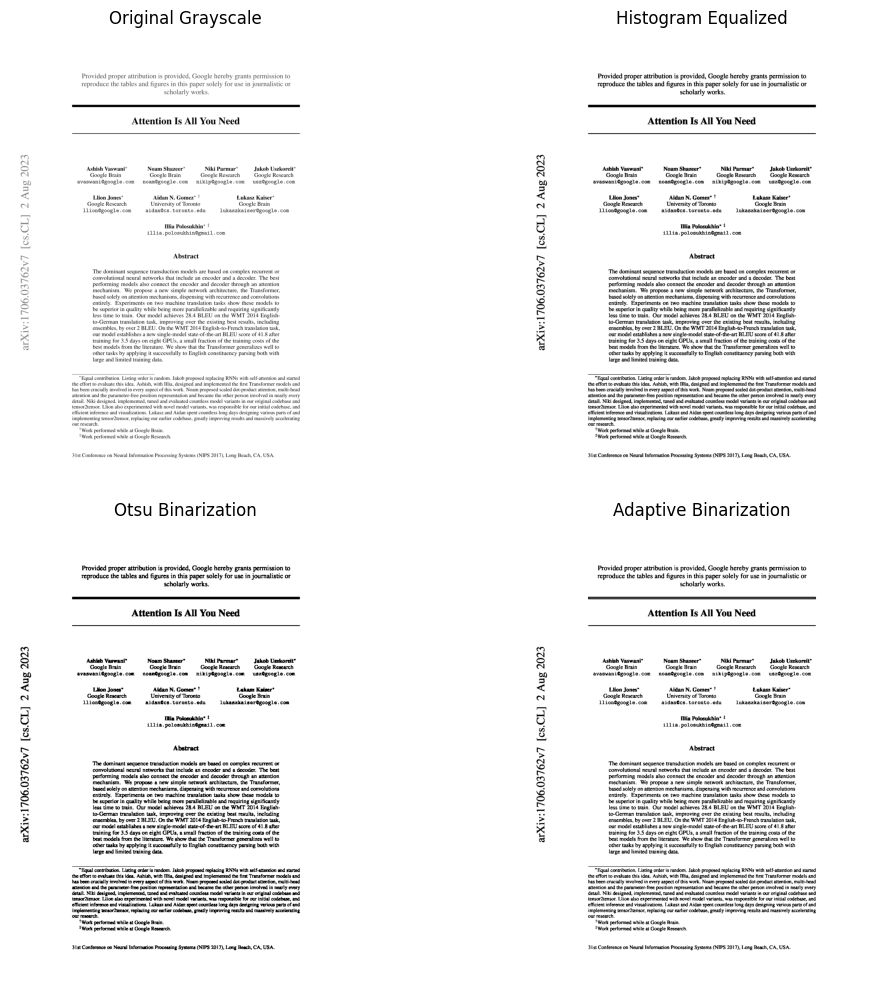

In [4]:
# Apply different binarization methods
equalized = equalize_histogram(gray)
gaussian = denoise_gaussian(equalized, kernel_size=5)
median = denoise_median(equalized, kernel_size=3)

otsu = binarize_otsu(gaussian)
adaptive = binarize_adaptive(median, block_size=11, C=2)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(gray, cmap='gray')
axes[0, 0].set_title('Original Grayscale')
axes[0, 0].axis('off')

axes[0, 1].imshow(equalized, cmap='gray')
axes[0, 1].set_title('Histogram Equalized')
axes[0, 1].axis('off')

axes[1, 0].imshow(otsu, cmap='gray')
axes[1, 0].set_title('Otsu Binarization')
axes[1, 0].axis('off')

axes[1, 1].imshow(adaptive, cmap='gray')
axes[1, 1].set_title('Adaptive Binarization')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## Full Pipeline Test

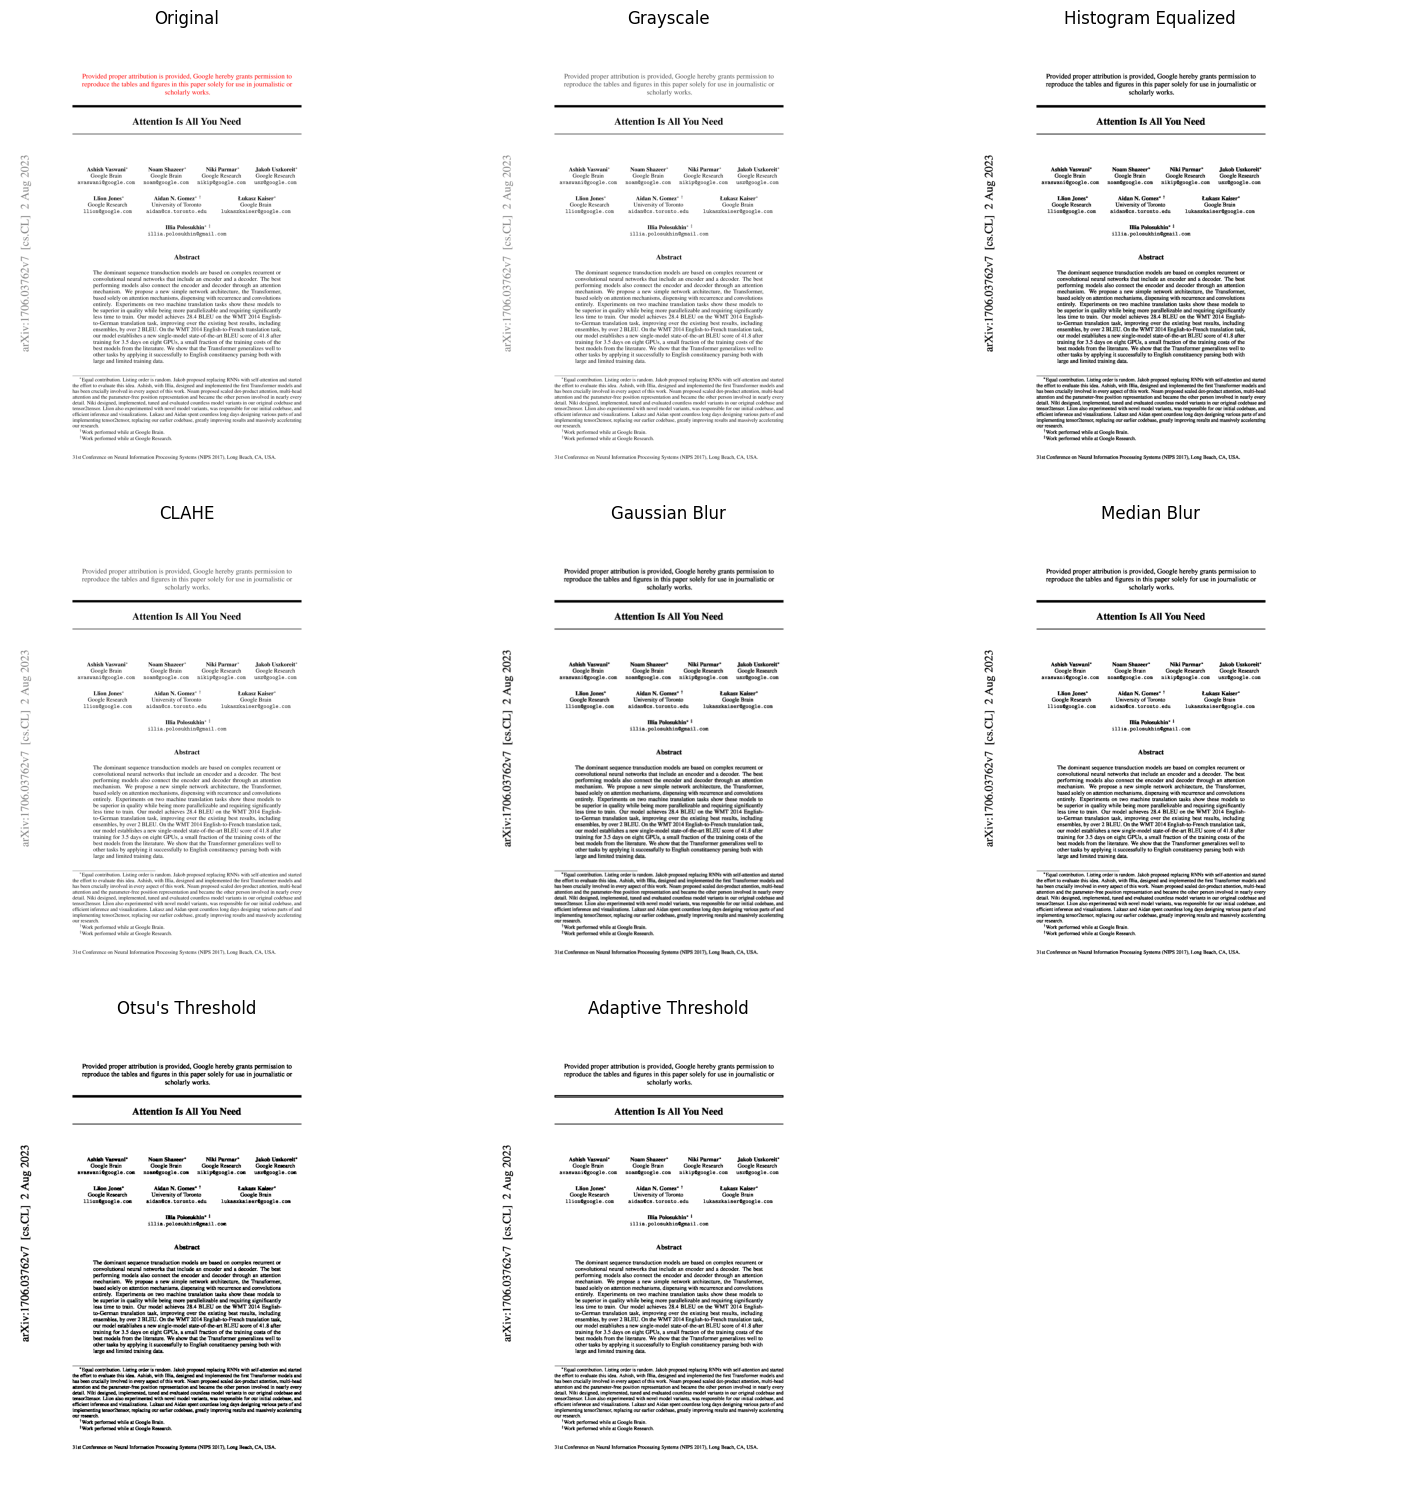

In [5]:
# Run the complete preprocessing pipeline
results = run_full_preprocessing(sample_page)

# Display all results
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

stages = [
    ('original', 'Original'),
    ('gray', 'Grayscale'),
    ('equalized', 'Histogram Equalized'),
    ('clahe', 'CLAHE'),
    ('gaussian', 'Gaussian Blur'),
    ('median', 'Median Blur'),
    ('otsu', "Otsu's Threshold"),
    ('adaptive', 'Adaptive Threshold')
]

for idx, (key, title) in enumerate(stages):
    row = idx // 3
    col = idx % 3
    
    if key == 'original':
        axes[row, col].imshow(cv2.cvtColor(results[key], cv2.COLOR_BGR2RGB))
    else:
        axes[row, col].imshow(results[key], cmap='gray')
    
    axes[row, col].set_title(title)
    axes[row, col].axis('off')

# Hide the last subplot
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()